In [3]:
from math import ceil
import sys
from matplotlib.axes import Axes
from matplotlib.colors import Normalize
from matplotlib.figure import Figure
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from pathlib import Path
import math

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

current_folder = globals()['_dh'][0]
sys.path.append(str(Path(current_folder,'..').resolve()))

from ModelTools.Utils import load_generate_all_csvs
from CustomEnvs.Indexes import OBS_INDEX
from CustomEnvs.CarParking import calculate_reward
from PostProcessing.Utils import MAP_BOUNDARY, divide_by_steps, point_parking
import MJCFGenerator.Config as mjcf_cfg
import PathsConfig as paths_cfg

pygame 2.5.2 (SDL 2.28.3, Python 3.10.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [7]:
def plot_terminal_positions(df, ax):
    grouped = df.groupby(by=["episode","env"])[['pos_X','pos_Y']].last()

    x = df['pos_X']
    y = df['pos_Y']
    
    x_terminal = grouped['pos_X']
    y_terminal = grouped['pos_Y']

    ax.set_xlim(MAP_BOUNDARY[0])
    ax.set_ylim(MAP_BOUNDARY[1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')

    ax.scatter(x,y, alpha=0.4, s=1)
    ax.scatter(x_terminal, y_terminal, alpha=0.1,color="green")
    # ax.legend()

In [5]:
%%capture --no-display

dfs = load_generate_all_csvs(overwrite=True)

Function divide_by_steps finished in: 0.7006 seconds.
Function divide_by_steps finished in: 0.7139 seconds.


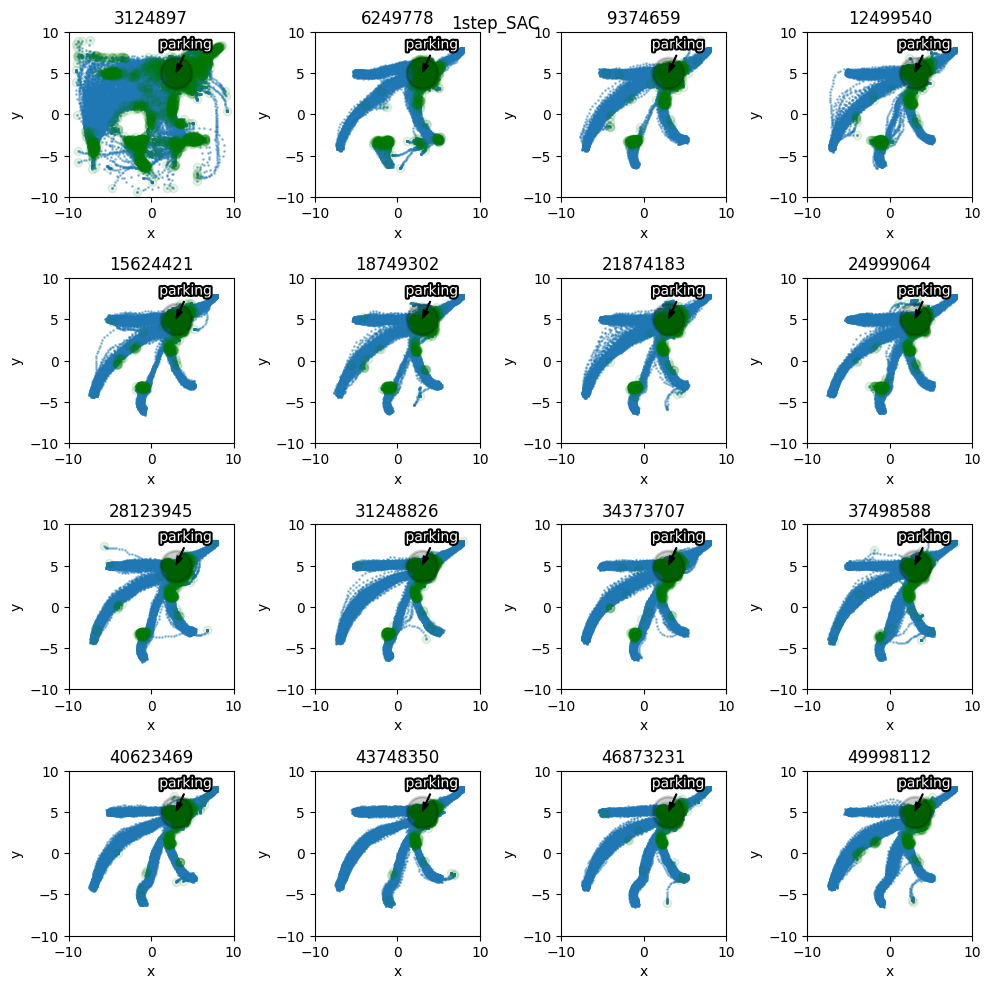

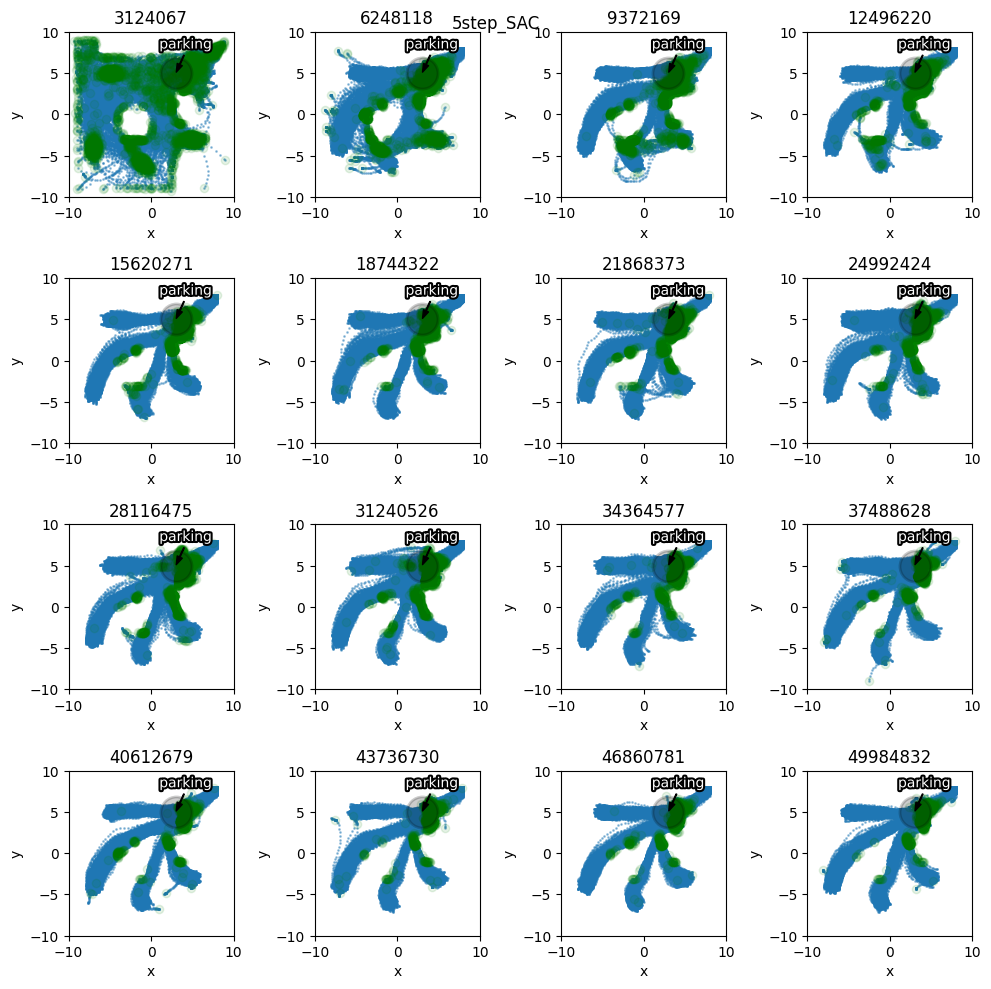

In [9]:
for dir, (df_episodes_all, df_episodes_summary, df_training_stats) in dfs.items():
    media_dir = Path(dir,"media")
    media_dir.mkdir(exist_ok=True)
    
    n_parts = 16    
    parts, bins = divide_by_steps(df_episodes_all, n_parts, min_step = None, max_step=None)
    
    fig, axs = plt.subplots(4,4, figsize=(10,10))
    axs = axs.flatten()
     
    for i in range(n_parts):
        plot_terminal_positions(parts[i], axs[i])
        point_parking(axs[i])
        axs[i].set_title(f"{int(bins[i+1])}")
    
    fig.tight_layout()
    fig.suptitle(Path(dir).stem)
    fig.savefig(str(Path(media_dir,"terminal_points.png")))